In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import numpy as np
import os
import ast
import Funciones as fn
from sklearn.linear_model import LinearRegression


Primero vamos a leer los datos y hacer un analisis exploratorio


In [2]:
ruta_datos = os.path.join("..", "Extraction", "Datos.csv")
ruta_mapa_categorico = os.path.join("..", "Extraction", "mapa_categorico.csv")
ruta_mapa_categorico_genero = os.path.join("..", "Extraction", "mapa_categorico_genero.csv")

datos = pd.read_csv(ruta_datos)
mapa_categorico = pd.read_csv(ruta_mapa_categorico)
mapa_categorico_genero = pd.read_csv(ruta_mapa_categorico_genero)
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   appid                1026 non-null   int64 
 1   required_age         1026 non-null   int64 
 2   is_free              1026 non-null   bool  
 3   price                1026 non-null   object
 4   developers           1026 non-null   object
 5   categories           1026 non-null   object
 6   release_date         1022 non-null   object
 7   genres               1026 non-null   object
 8   name                 1026 non-null   object
 9   Historico            1026 non-null   int64 
 10  review_score         1026 non-null   int64 
 11  review_score_desc    1026 non-null   object
 12  total_reviews        1026 non-null   int64 
 13  categories_numerico  1026 non-null   object
 14  genres_numerico      1026 non-null   object
dtypes: bool(1), int64(5), object(9)
memory usage: 113.3+ KB

In [3]:
datos.loc[datos.index[-2:], 'release_date'] = pd.to_datetime(
    datos.loc[datos.index[-2:], 'release_date'],
    dayfirst=True,
    errors='coerce'
)
datos.loc[datos.index[-4], 'release_date'] = pd.to_datetime(
    datos.loc[datos.index[-4], 'release_date'],
    dayfirst=True,
    errors='coerce'
)

datos.loc[datos.index[-3], 'release_date'] = pd.to_datetime(
    datos.loc[datos.index[-3], 'release_date'],
    format="%b %d, %Y",
    errors='coerce'
)



In [4]:
mapping_dict = dict(zip(mapa_categorico['clave'], mapa_categorico['genero']))
mapping_dict_gen = dict(zip(mapa_categorico_genero['clave'], mapa_categorico_genero['genero']))


In [5]:
resultados = [] #hay un juego muy importante que no está en la base de datos original, asi que lo añado manualmente
fila = fn.fetch_app_full(1903340)  
resultados.append(fila)
dfexpedition = pd.DataFrame(resultados)
dfexpedition.head()


,appid,review_score,review_score_desc,total_reviews,name,type,required_age,is_free,developers,price,categories,release_date,genres
0,1903340,9,Overwhelmingly Positive,69391,Clair Obscur: Expedition 33,game,0,False,Sandfall Interactive,"R$ 191,20","[Single-player, Steam Achievements, Full contr...","24 Apr, 2025","[Action, RPG]"


In [6]:
dfexpedition = dfexpedition.drop(columns=['type'])


In [7]:
dfexpedition['Historico'] = 145063
dfexpedition['price'] = 'CLP$ 32.480' #esta columna no es necesaria siempre, pero existe la posibilidad de que al ejecutar la funcion, el precio cambie de nacionalidad
dfexpedition['genres_numerico'] = dfexpedition['genres'].apply(lambda lista: [mapping_dict_gen.get(x) for x in lista])
dfexpedition['categories_numerico'] = dfexpedition['categories'].apply(lambda lista: [mapping_dict.get(x) for x in lista])
dfexpedition["categories"] = dfexpedition["categories"].astype(str)
dfexpedition["genres"] = dfexpedition["genres"].astype(str)
dfexpedition["categories_numerico"] = dfexpedition["categories_numerico"].astype(str)
dfexpedition["genres_numerico"] = dfexpedition["genres_numerico"].astype(str)
dfexpedition["categories"] = dfexpedition["categories"].apply(
    lambda x: x.replace('[', '(').replace(']', ')') if isinstance(x, str) else x
)
dfexpedition["genres"] = dfexpedition["genres"].apply(
    lambda x: x.replace('[', '(').replace(']', ')') if isinstance(x, str) else x
)
dfexpedition["categories_numerico"] = dfexpedition["categories_numerico"].apply(
    lambda x: x.replace('[', '(').replace(']', ')') if isinstance(x, str) else x
)
dfexpedition["genres_numerico"] = dfexpedition["genres_numerico"].apply(
    lambda x: x.replace('[', '(').replace(']', ')') if isinstance(x, str) else x
)
dfexpedition.head()

,appid,review_score,review_score_desc,total_reviews,name,required_age,is_free,developers,price,categories,release_date,genres,Historico,genres_numerico,categories_numerico
0,1903340,9,Overwhelmingly Positive,69391,Clair Obscur: Expedition 33,0,False,Sandfall Interactive,CLP$ 32.480,"('Single-player', 'Steam Achievements', 'Full ...","24 Apr, 2025","('Action', 'RPG')",145063,"(0, 5)","(22, 25, 26, 5, 8, 29, 10, 31, 11, 32, 36)"


In [8]:
dfexpedition['release_date'] = pd.to_datetime(dfexpedition['release_date'], format='%d %b, %Y')

In [9]:
datos = pd.concat([datos, dfexpedition], ignore_index=True)

In [10]:
fila_index = datos.loc[datos['name'] == 'ARC Raiders'].index[0] #arreglo la fila de ARC Raiders pq esta mala
datos.at[fila_index, 'genres'] = "('Action')"
datos.loc[datos['name'] == 'ARC Raiders', 'genres_numerico'] = "(0,)"
datos.at[fila_index, 'price'] = 'CLP$ 31011'

In [11]:
datos.loc[datos['name'] == 'ARC Raiders']

,appid,required_age,is_free,price,developers,categories,release_date,genres,name,Historico,review_score,review_score_desc,total_reviews,categories_numerico,genres_numerico
1023,1808500,0,False,CLP$ 31011,Embark Studios,"('Multi-player', 'PvP', 'Online PvP', 'Co-op',...",2025-10-30 00:00:00,('Action'),ARC Raiders,481966,8,Very Positive,69832,"(0, 20, 21, 18, 24, 1, 25, 26, 4, 13, 36)","(0,)"


In [12]:
datos.loc[~datos['is_free'], 'price'] = (
    datos.loc[~datos['is_free'], 'price']
    .str.replace('CLP$', '', regex=False)  # quita 'CLP$'
    .str.replace('.', '', regex=False)     # quita puntos de miles
    .str.strip()                           # quita espacios
)

In [13]:
datos.head()

,appid,required_age,is_free,price,developers,categories,release_date,genres,name,Historico,review_score,review_score_desc,total_reviews,categories_numerico,genres_numerico
0,730,0,True,0,Valve,"('Multi-player', 'Cross-Platform Multiplayer',...",2012-08-21 00:00:00,"('Action', 'Free To Play')",Counter-Strike 2,1862531,8,Very Positive,1378000,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1)"
1,730,0,True,0,Valve,"('Multi-player', 'Cross-Platform Multiplayer',...",2012-08-21 00:00:00,"('Action', 'Free To Play')",Counter-Strike,319586,8,Very Positive,1378000,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1)"
2,570,0,True,0,Valve,"('Multi-player', 'Co-op', 'Steam Trading Cards...",2013-07-09 00:00:00,"('Action', 'Strategy', 'Free To Play')",Dota 2,1295114,8,Very Positive,6095,"(0, 18, 2, 3, 19, 4, 6, 7, 8, 12, 17)","(0, 2, 1)"
3,578080,13,True,0,PUBG Corporation,"('Multi-player', 'PvP', 'Online PvP', 'Stats',...",2017-12-21 00:00:00,"('Action', 'Adventure', 'Massively Multiplayer...",PUBG: BATTLEGROUNDS,3257248,5,Mixed,278049,"(0, 20, 21, 13, 14, 15)","(0, 3, 4, 1)"
4,2507950,0,True,0,Team Jade,"('Single-player', 'Multi-player', 'MMO', 'PvP'...",2024-12-04 00:00:00,"('Action', 'Adventure', 'Massively Multiplayer...",Delta Force,247028,0,No user reviews,0,"(22, 0, 23, 20, 21, 18, 24, 1, 25, 26, 2, 4)","(0, 3, 4, 1)"


In [14]:
datos["categories_numerico"] = datos["categories_numerico"].apply(ast.literal_eval) #por alguna razon. ejecutar esta linea multiples veces genera un error
datos["genres_numerico"] = datos["genres_numerico"].apply(ast.literal_eval)
datos["categories"] = datos["categories"].apply(ast.literal_eval)
datos["genres"] = datos["genres"].apply(ast.literal_eval)
datos["price"] = datos["price"].astype(int)


Me interesa saber cuales son las categorias mas presente en este Dataframe, asi que vamos a graficar las categorias

In [15]:
numeros_aplanados = [n for tupla in datos["genres_numerico"] for n in tupla]
conteo = pd.Series(numeros_aplanados).value_counts().reset_index()
conteo.columns = ["numero", "frecuencia"]
conteo.head()

,numero,frecuencia
0,0,469
1,7,459
2,3,378
3,12,348
4,5,336


In [16]:
mapa_categorico_genero.head()

,clave,genero
0,Action,0
1,Free To Play,1
2,Strategy,2
3,Adventure,3
4,Massively Multiplayer,4


In [17]:
df_grafico = conteo.merge(mapa_categorico_genero, left_on='numero', right_on="genero", how="left")

In [18]:
df_grafico["clave"].unique() 

array(['Action', 'Indie', 'Adventure', 'Simulation', 'RPG', 'Strategy',
       'Casual', 'Free To Play', 'Massively Multiplayer', 'Early Access',
       'Sports', 'Racing', 'Utilities', 'Animation & Modeling',
       'Design & Illustration', 'Video Production', 'Game Development',
       'Education', 'Web Publishing', 'Violent', 'Photo Editing', 'Aksi',
       'Audio Production', 'Software Training', 'Gore'], dtype=object)

In [19]:
df_grafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   numero      25 non-null     int64 
 1   frecuencia  25 non-null     int64 
 2   clave       25 non-null     object
 3   genero      25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 932.0+ bytes


In [20]:
df_grafico

,numero,frecuencia,clave,genero
0,0,469,Action,0
1,7,459,Indie,7
2,3,378,Adventure,3
3,12,348,Simulation,12
4,5,336,RPG,5
5,2,334,Strategy,2
6,6,265,Casual,6
7,1,221,Free To Play,1
8,4,99,Massively Multiplayer,4
9,15,99,Early Access,15


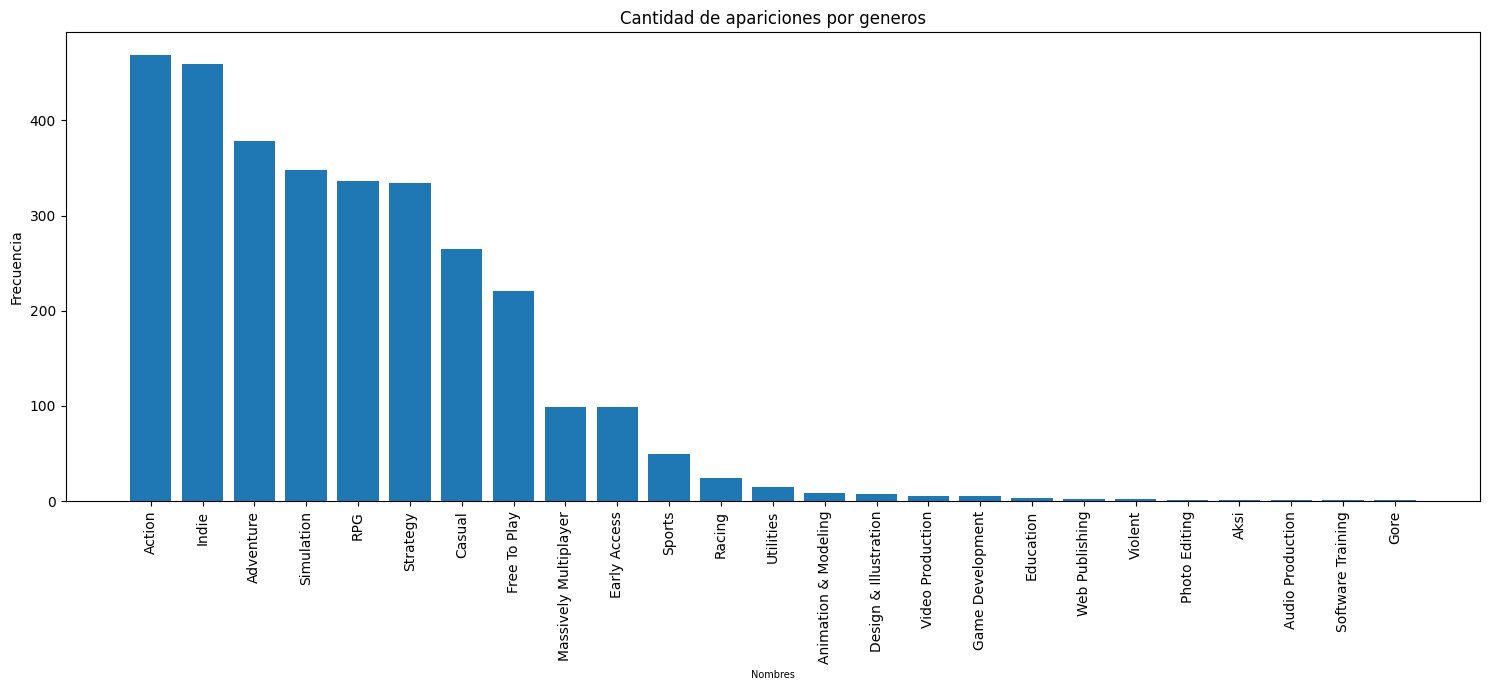

In [21]:
plt.figure(figsize=(15,7))
plt.bar(df_grafico["clave"], df_grafico["frecuencia"])
plt.xticks(rotation=90)
plt.xlabel("Nombres", fontsize=7) 
plt.ylabel("Frecuencia")
plt.title("Cantidad de apariciones por generos")
plt.tight_layout()
plt.show()

Vemos que los juegos principalmente son de accion, indie  de aventuras

Ahora me gustaria saber si la desarrolladora tiene algo que ver con la cantidad de jugadores peak de un juego (la columna historico es la cantidad maxima de jugadores unicos registrados en 24 horas)

In [22]:
# Contar juegos por developer
conteos = datos["developers"].value_counts()

#queremos los developers con mas de 2 juegos
dev_validos = conteos[conteos > 2].index


In [ ]:
df_developers = datos[datos["developers"].isin(dev_validos)]
df_developers["dev_code"] = pd.factorize(df_developers["developers"])[0]
correlacion = df_developers[["dev_code", "Historico"]].corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\291945468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developers["dev_code"] = pd.factorize(df_developers["developers"])[0] #para usar corr necesitamos valores numericos


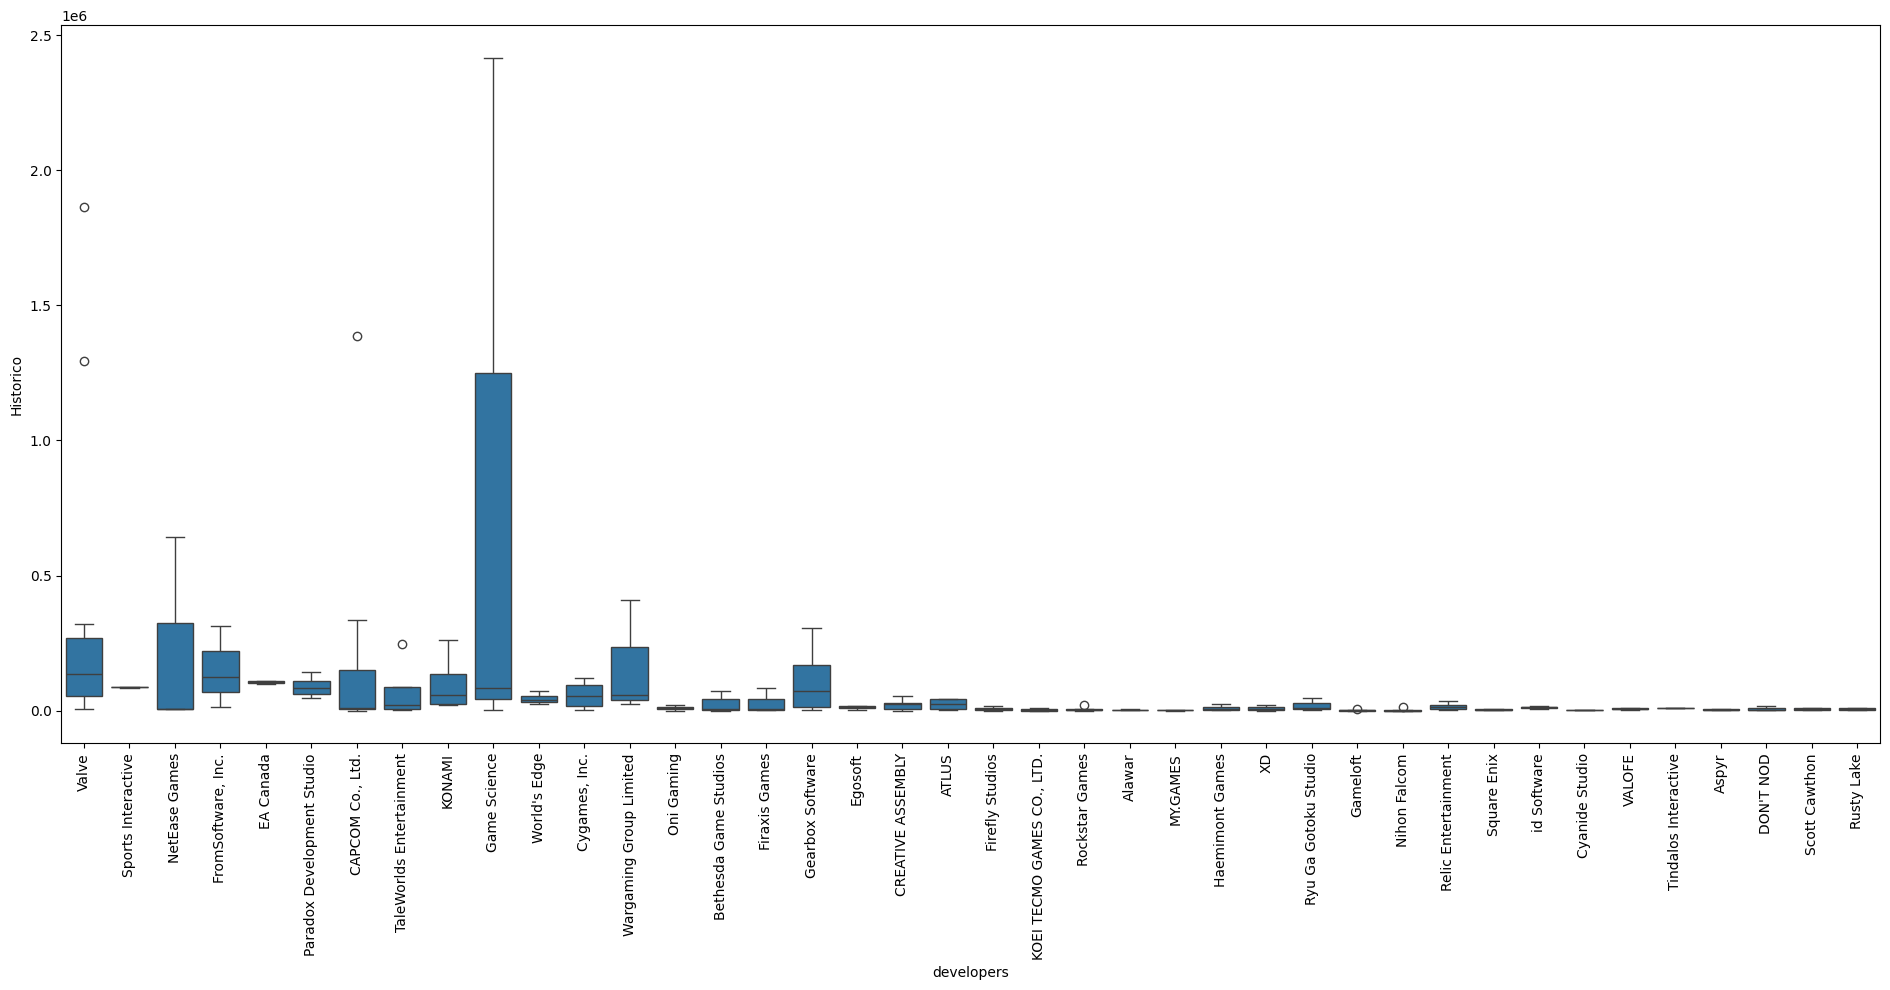

In [24]:
plt.figure(figsize=(19,10))
sns.boxplot(data=df_developers, x="developers", y="Historico")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Vemos que hay un developer que sobre sale por demasiado de los demas, vamos a agregar un limite para que no rompa la escala

In [25]:
limite = df_developers["Historico"].quantile(0.95)
df_developers["Historico_cap"] = df_developers["Historico"].clip(upper=limite)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\2100842648.py:2: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_developers["Historico_cap"] = df_developers["Historico"].clip(upper=limite)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\2100842648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developers["Historico_cap"] = df_developers["Historico"].clip(upper=limite)


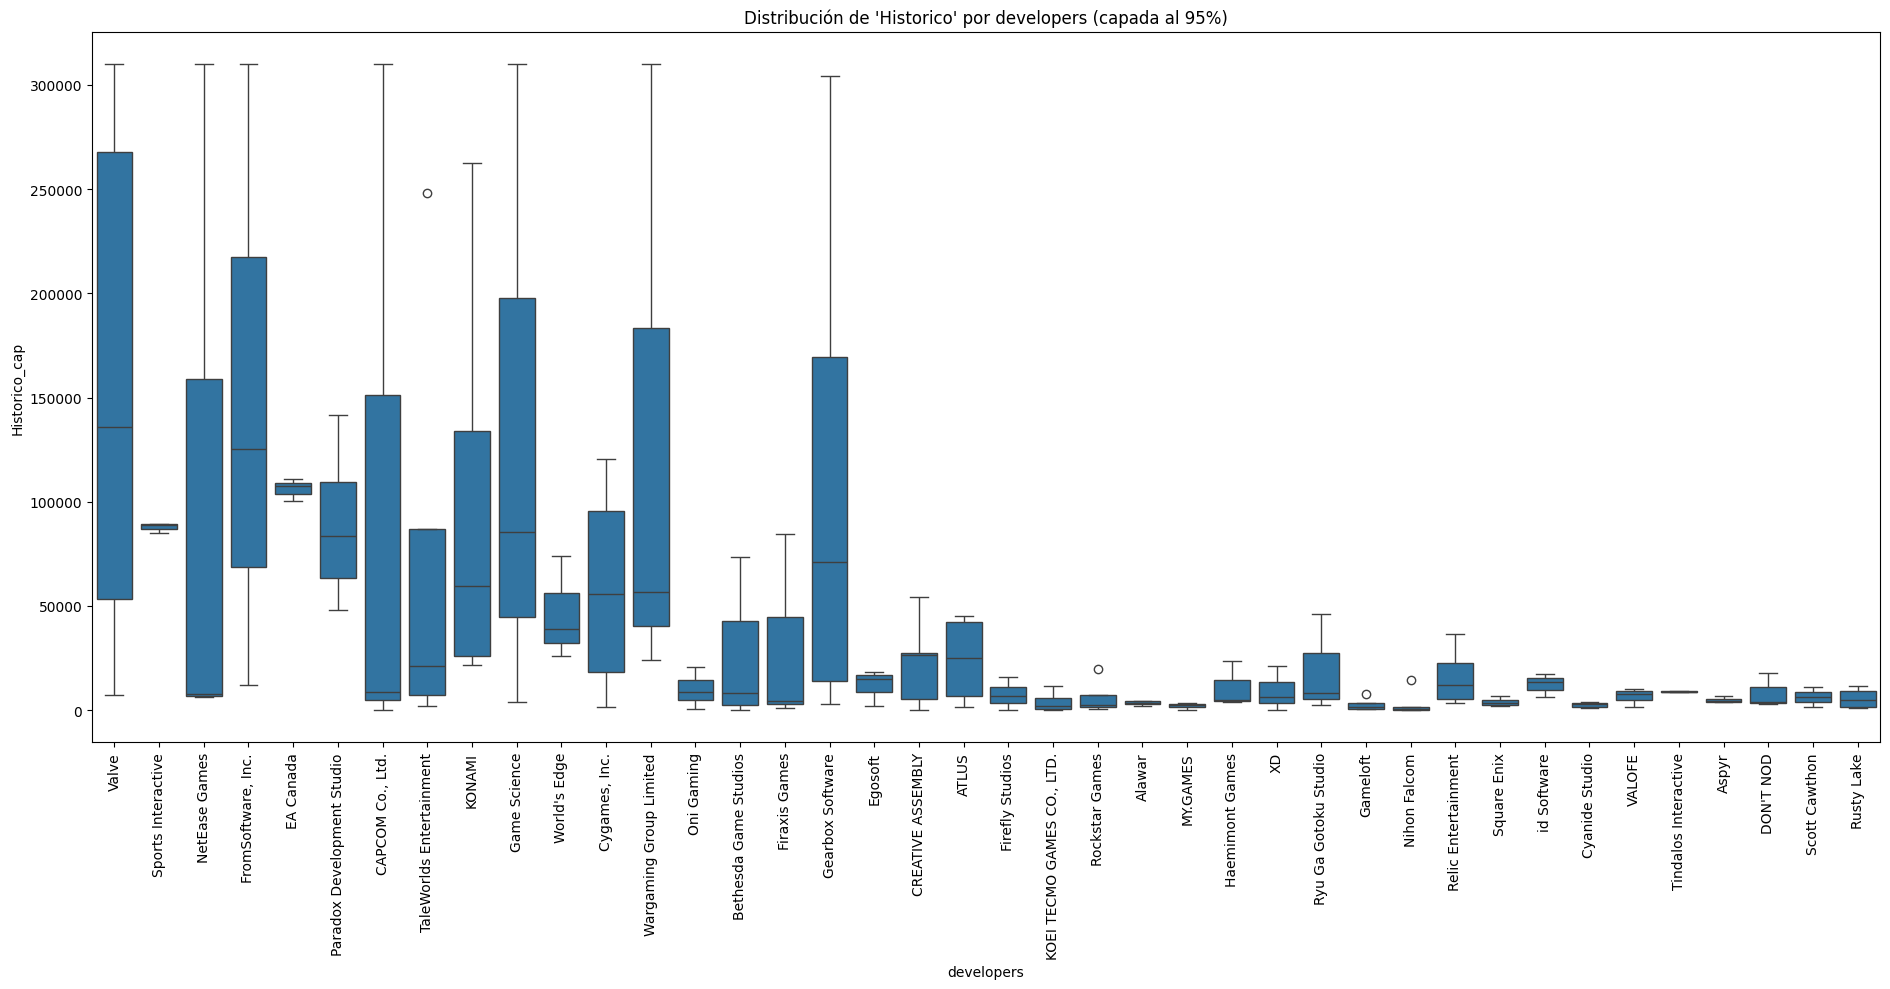

In [26]:
plt.figure(figsize=(19,10))
sns.boxplot(data=df_developers, x="developers", y="Historico_cap")
plt.xticks(rotation=90)
plt.title("Distribución de 'Historico' por developers (capada al 95%)")
plt.tight_layout()
plt.show()

Esto nos permite ver las compañias que han generado juegos que han tenido una cantidad de jugadores simultaneos muy alta, pero solo para aquellos juegos de compañias con mas de 2 juegos, que ocurre con los juegos independientes que son un exito?

In [27]:
umbral = datos["Historico"].quantile(0.90)
df_top10 = datos[datos["Historico"] >= umbral]
df_top10 = df_top10.sort_values("Historico", ascending=False) #los ordenamos solo para que el grafico se vea mejor


C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


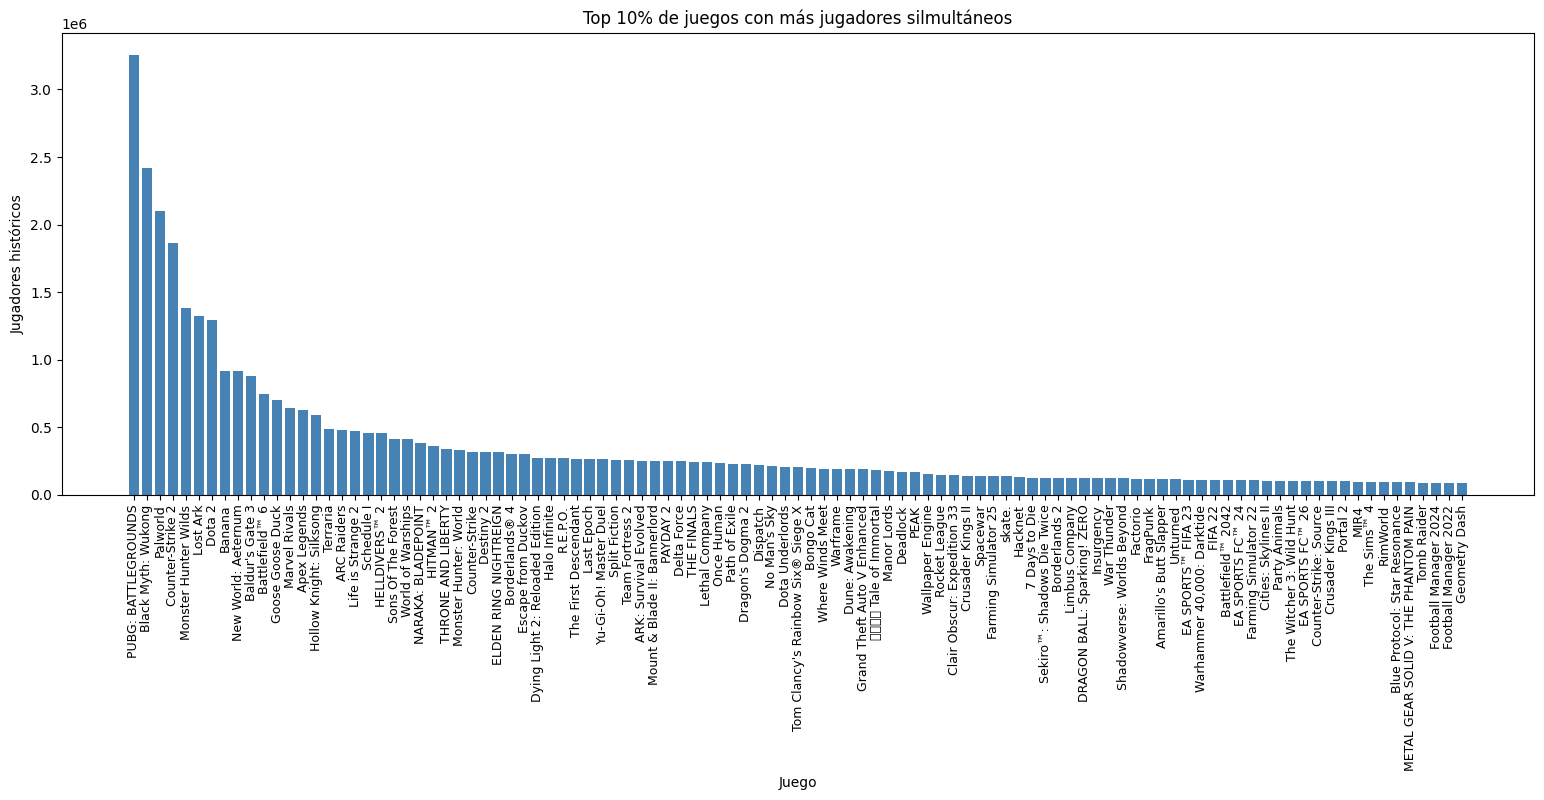

In [28]:
plt.figure(figsize=(19,6))
plt.bar(df_top10["name"], df_top10["Historico"], color="steelblue")

plt.xticks(rotation=90, fontsize=9)
plt.ylabel("Jugadores históricos")
plt.xlabel("Juego")
plt.title("Top 10% de juegos con más jugadores silmultáneos")
plt.show()

El precio tiene relacion con la cantidad de jugadores historicos de un juego? los juegos gratis por logica tienden a ser los mas jugados puesto que son gratis, pero es cierto?

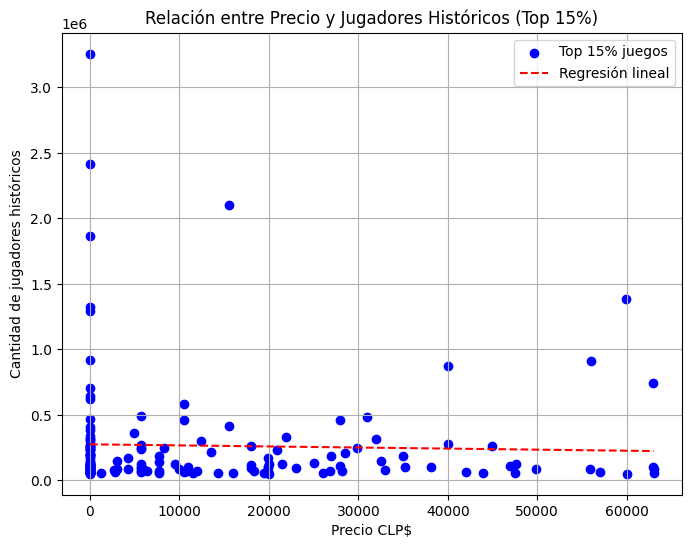

Inclinación (pendiente): [-0.8141298]
Intercepto: [275617.42820691]


In [29]:
umbral = datos['Historico'].quantile(0.85) #tomamos el top 15% para no tener outliers de juegos con precios muy altos y pocos jugadores
top_juegos = datos[datos['Historico'] >= umbral]

X = top_juegos['price'].values.reshape(-1, 1)  # 2D para sklearn
y = top_juegos['Historico'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

x_line = np.linspace(top_juegos['price'].min(), top_juegos['price'].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)


plt.figure(figsize=(8,6))
plt.scatter(top_juegos['price'], top_juegos['Historico'], color='blue', label='Top 15% juegos')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Regresión lineal')
plt.xlabel('Precio CLP$')
plt.ylabel('Cantidad de jugadores históricos')
plt.title('Relación entre Precio y Jugadores Históricos (Top 15%)')
plt.legend()
plt.grid(True)
plt.show()
pendiente = model.coef_[0]
intercepto = model.intercept_

print(f"Inclinación (pendiente): {pendiente}")
print(f"Intercepto: {intercepto}")

Vemos que aun asi hay outliers que afectan demasiado al grafico, asi que vamos a tratarlos de otra manera

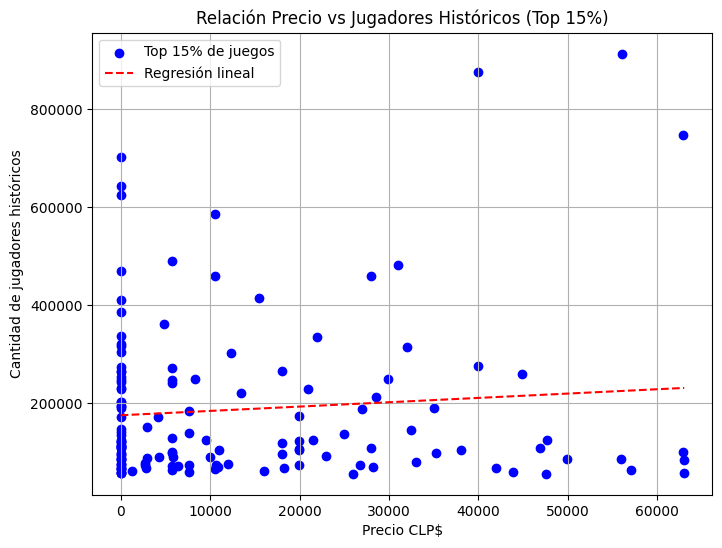

Pendiente de la regresión: [0.88644688]
Intercepto de la regresión: [174987.10473781]


In [30]:
umbral = datos['Historico'].quantile(0.85) #tomamos el top 15% 
top_juegos = datos[datos['Historico'] >= umbral]

Q1 = top_juegos['Historico'].quantile(0.05) #filtramos valores historicos bajos dentro del top 15%
Q3 = top_juegos['Historico'].quantile(0.95) #filtramos valores historicos altos dentro del top 15%
top_juegos_filtrado = top_juegos[(top_juegos['Historico'] >= Q1) & (top_juegos['Historico'] <= Q3)]

X = top_juegos_filtrado['price'].values.reshape(-1, 1)
y = top_juegos_filtrado['Historico'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

x_line = np.linspace(top_juegos_filtrado['price'].min(), top_juegos_filtrado['price'].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.figure(figsize=(8,6))
plt.scatter(top_juegos_filtrado['price'], top_juegos_filtrado['Historico'],
            color='blue', label='Top 15% de juegos')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Regresión lineal')
plt.xlabel('Precio CLP$')
plt.ylabel('Cantidad de jugadores históricos')
plt.title('Relación Precio vs Jugadores Históricos (Top 15%)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente de la regresión: {model.coef_[0]}")
print(f"Intercepto de la regresión: {model.intercept_}")


que ocurre si reducimos aun mas los outliers?

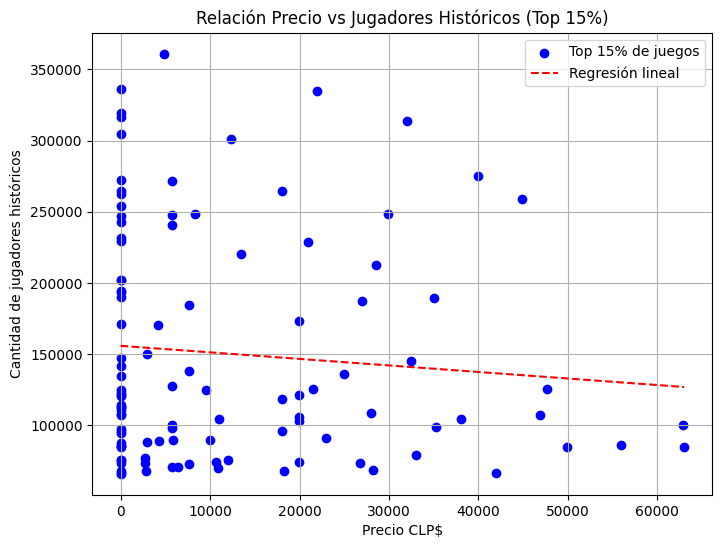

Pendiente de la regresión: [-0.45924629]
Intercepto de la regresión: [155841.94192325]


In [31]:
umbral = datos['Historico'].quantile(0.85) #tomamos el top 15% 
top_juegos = datos[datos['Historico'] >= umbral]

Q1 = top_juegos['Historico'].quantile(0.15) #filtramos valores historicos bajos dentro del top 15%
Q3 = top_juegos['Historico'].quantile(0.85) #filtramos valores historicos altos dentro del top 15%
top_juegos_filtrado = top_juegos[(top_juegos['Historico'] >= Q1) & (top_juegos['Historico'] <= Q3)]

X = top_juegos_filtrado['price'].values.reshape(-1, 1)
y = top_juegos_filtrado['Historico'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

x_line = np.linspace(top_juegos_filtrado['price'].min(), top_juegos_filtrado['price'].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.figure(figsize=(8,6))
plt.scatter(top_juegos_filtrado['price'], top_juegos_filtrado['Historico'],
            color='blue', label='Top 15% de juegos')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Regresión lineal')
plt.xlabel('Precio CLP$')
plt.ylabel('Cantidad de jugadores históricos')
plt.title('Relación Precio vs Jugadores Históricos (Top 15%)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente de la regresión: {model.coef_[0]}")
print(f"Intercepto de la regresión: {model.intercept_}")


Ahora voy a ver si puedo encontrar un patron entre la cantidad de jugadores y el genero, haciendo que cada juego aporte un punto diferente por cada genero que participe, y que el color del punto dependa de la clasificacion

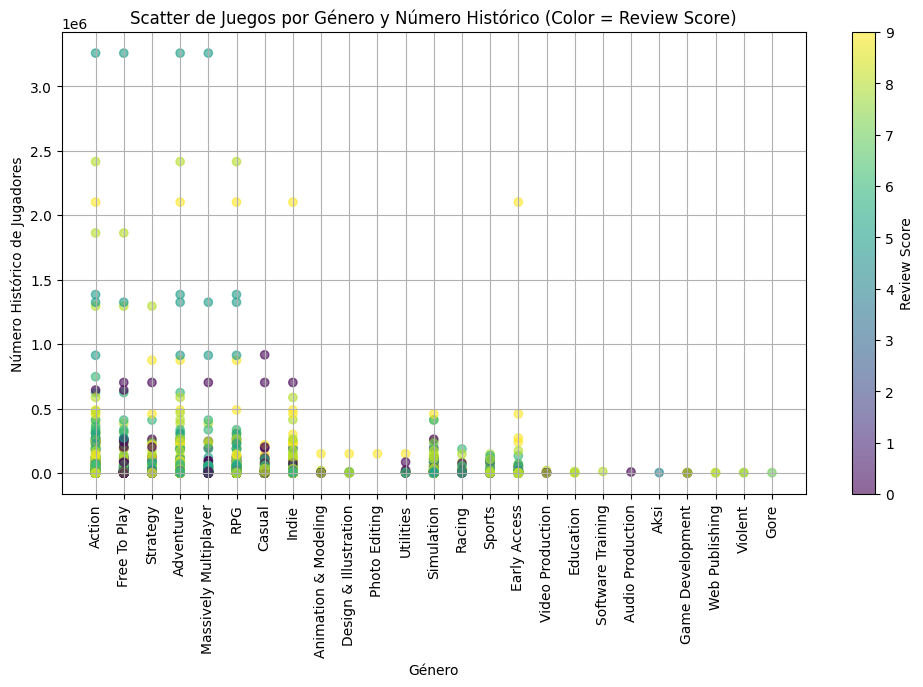

In [32]:
datos_exploded = datos.explode('genres')

# 2️⃣ Graficar
plt.figure(figsize=(12,6))
scatter = plt.scatter(
    x=datos_exploded['genres'], 
    y=datos_exploded['Historico'],
    c=datos_exploded['review_score'],  # color según score
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Review Score')
plt.xlabel('Género')
plt.ylabel('Número Histórico de Jugadores')
plt.title('Scatter de Juegos por Género y Número Histórico (Color = Review Score)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Como se puede ver denuevo los outliers molestan asi que los retiramos para ver mejor lo que ocurre

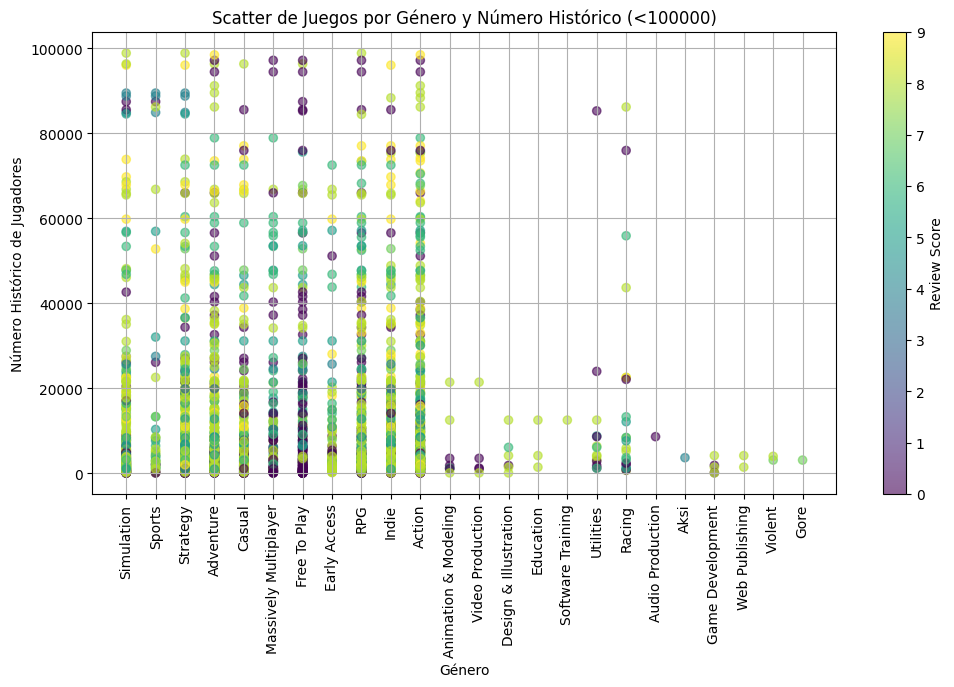

In [33]:
datos_filtrados = datos[datos['Historico'] < 100000]

datos_exploded = datos_filtrados.explode('genres')

plt.figure(figsize=(12,6))
scatter = plt.scatter(
    x=datos_exploded['genres'], 
    y=datos_exploded['Historico'],
    c=datos_exploded['review_score'],  # color según score
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Review Score')
plt.xlabel('Género')
plt.ylabel('Número Histórico de Jugadores')
plt.title('Scatter de Juegos por Género y Número Histórico (<100000)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Pareciera ser que los juego Free To Play son los que mas reseñas negativas consiguen, y se aglomera en los juegos con menos de 20000 jugadores historicos, cosa que tiene sentido puesto que son juegos accequibles para todo el mundo

Ahora pasando a la pregunta importante, sabiendo la relacion entre genero, cantidad, calidad, precio, y cuales generos tienden a tener la mayor cantidad de jugadores, veremos cuales son los mejores juegos de 2025

In [34]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   appid                1027 non-null   int64 
 1   required_age         1027 non-null   int64 
 2   is_free              1027 non-null   bool  
 3   price                1027 non-null   int64 
 4   developers           1027 non-null   object
 5   categories           1027 non-null   object
 6   release_date         1023 non-null   object
 7   genres               1027 non-null   object
 8   name                 1027 non-null   object
 9   Historico            1027 non-null   int64 
 10  review_score         1027 non-null   int64 
 11  review_score_desc    1027 non-null   object
 12  total_reviews        1027 non-null   int64 
 13  categories_numerico  1027 non-null   object
 14  genres_numerico      1027 non-null   object
dtypes: bool(1), int64(6), object(8)
memory usage: 113.5+ KB

In [35]:
datos['release_date'] = pd.to_datetime(datos['release_date'], errors='coerce')
datos.tail(6)


,appid,required_age,is_free,price,developers,categories,release_date,genres,name,Historico,review_score,review_score_desc,total_reviews,categories_numerico,genres_numerico
1021,71340,0,False,0,Devil's Details,"(Single-player, Steam Achievements, Full contr...",2011-11-03,"(Action,)",Sonic Generations,1686,8,Very Positive,12460,"(22, 25, 26, 32, 13, 59, 14, 15, 16, 36)","(0,)"
1022,3164500,0,False,10500,TVGS,"(Single-player, Multi-player, Co-op, Online Co...",2025-03-24,"(Action, Indie, Simulation, Strategy, Early Ac...",Schedule I,459075,9,Overwhelmingly Positive,160341,"(22, 0, 18, 24, 25, 5, 6, 8, 49, 10, 32, 36)","(0, 7, 12, 2, 15)"
1023,1808500,0,False,31011,Embark Studios,"(Multi-player, PvP, Online PvP, Co-op, Online ...",2025-10-30,Action,ARC Raiders,481966,8,Very Positive,69832,"(0, 20, 21, 18, 24, 1, 25, 26, 4, 13, 36)","(0,)"
1024,1030300,0,False,10500,Team Cherry,"(Single-player, Steam Achievements, Full contr...",2025-09-04,"(Action, Adventure, Indie)",Hollow Knight: Silksong,587150,8,Very Positive,108275,"(22, 25, 26, 2, 6, 30, 9, 49, 10, 32, 16, 36)","(0, 3, 7)"
1025,3527290,0,False,4200,Team PEAK,"(Single-player, Multi-player, Co-op, Online Co...",2025-06-16,"(Action, Adventure, Indie)",PEAK,170759,8,Very Positive,84934,"(22, 0, 18, 24, 25, 26, 2, 36)","(0, 3, 7)"
1026,1903340,0,False,32480,Sandfall Interactive,"(Single-player, Steam Achievements, Full contr...",2025-04-24,"(Action, RPG)",Clair Obscur: Expedition 33,145063,9,Overwhelmingly Positive,69391,"(22, 25, 26, 5, 8, 29, 10, 31, 11, 32, 36)","(0, 5)"


In [36]:
juegos_2025 = datos[datos['release_date'].dt.year == 2025]
juegos_no_2025 = datos[datos['release_date'].dt.year != 2025]


In [37]:
dev_counts = juegos_no_2025['developers'].value_counts()

def calcular_exito(fila):
    dev = fila['developers']

    # Si tiene solo 1 juego → devolver 1
    if dev_counts[dev] <= 1:
        return 100
    
    # Si tiene más de 1 → percentil dentro del developer
    subset = juegos_no_2025[juegos_no_2025['developers'] == dev]['Historico']
    rank = subset.rank(pct=True)[fila.name] * 100
    return rank

In [38]:
juegos_no_2025['pct_exito'] = juegos_no_2025.apply(calcular_exito, axis=1)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\1289062333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_no_2025['pct_exito'] = juegos_no_2025.apply(calcular_exito, axis=1)


In [39]:
gen_exp = juegos_no_2025.explode('genres_numerico') #otro en base a el genero que estos juegos pertenecen
corr_gen = gen_exp.groupby('genres_numerico')['Historico'].mean()
corr_gen = (corr_gen - corr_gen.min()) / (corr_gen.max() - corr_gen.min())

In [40]:
cat_exp = juegos_no_2025.explode('categories_numerico') #y a las categorias
corr_cat = cat_exp.groupby('categories_numerico')['Historico'].mean()
corr_cat = (corr_cat - corr_cat.min()) / (corr_cat.max() - corr_cat.min())

In [41]:
def score_generos(tupla):
    if pd.isna(tupla):
        return 0
    return sum(corr_gen.get(g, 0) for g in tupla) / len(tupla)

def score_categorias(tupla):
    if pd.isna(tupla):
        return 0
    return sum(corr_cat.get(c, 0) for c in tupla) / len(tupla)

In [42]:
juegos_no_2025['score_generos'] = juegos_no_2025['genres_numerico'].apply(score_generos)

juegos_no_2025['score_categorias'] = juegos_no_2025['categories_numerico'].apply(score_categorias)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\3233617462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_no_2025['score_generos'] = juegos_no_2025['genres_numerico'].apply(score_generos)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\3233617462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_no_2025['score_categorias'] = juegos_no_2025['categories_numerico'].apply(score_categorias)


In [43]:
corr_price = juegos_no_2025['price'].corr(juegos_no_2025['Historico'])
print("Correlación price vs Historico:", corr_price) #esto es para ver si la correlacion es positiva o negativa


Correlación price vs Historico: -0.019167132032959614


In [44]:
juegos_no_2025['price_norm'] = (juegos_no_2025['price'] - juegos_no_2025['price'].min()) / \
                               (juegos_no_2025['price'].max() - juegos_no_2025['price'].min())

corr_price = juegos_no_2025['price'].corr(juegos_no_2025['Historico'])

precio_contrib = juegos_no_2025['price_norm'] * (-100 if corr_price < 0 else 100)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\2180996090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_no_2025['price_norm'] = (juegos_no_2025['price'] - juegos_no_2025['price'].min()) / \


In [45]:
juegos_no_2025['pct_exito'] = (0.2 * juegos_no_2025['pct_exito'] + 0.45 * juegos_no_2025['score_generos'] + 0.3 * juegos_no_2025['score_categorias'] + 0.05 * juegos_no_2025['price_norm']) #estos porcentajes son determinados por mi, asi que pueden dar resultados lejos de la realidad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\256703450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_no_2025['pct_exito'] = (0.2 * juegos_no_2025['pct_exito'] + 0.45 * juegos_no_2025['score_generos'] + 0.3 * juegos_no_2025['score_categorias'] + 0.05 * juegos_no_2025['price_norm']) #estos porcentajes son determinados por mi, asi que pueden dar resultados lejos de la realidad


In [46]:
juegos_no_2025.head()

,appid,required_age,is_free,price,developers,categories,release_date,genres,name,Historico,review_score,review_score_desc,total_reviews,categories_numerico,genres_numerico,pct_exito,score_generos,score_categorias,price_norm
0,730,0,True,0,Valve,"(Multi-player, Cross-Platform Multiplayer, Ste...",2012-08-21,"(Action, Free To Play)",Counter-Strike 2,1862531,8,Very Positive,1378000,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1)",20.313746,0.580830,0.174574,0.0
1,730,0,True,0,Valve,"(Multi-player, Cross-Platform Multiplayer, Ste...",2012-08-21,"(Action, Free To Play)",Counter-Strike,319586,8,Very Positive,1378000,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1)",16.980412,0.580830,0.174574,0.0
2,570,0,True,0,Valve,"(Multi-player, Co-op, Steam Trading Cards, Ste...",2013-07-09,"(Action, Strategy, Free To Play)",Dota 2,1295114,8,Very Positive,6095,"(0, 18, 2, 3, 19, 4, 6, 7, 8, 12, 17)","(0, 2, 1)",18.611383,0.452427,0.248193,0.0
3,578080,13,True,0,PUBG Corporation,"(Multi-player, PvP, Online PvP, Stats, Remote ...",2017-12-21,"(Action, Adventure, Massively Multiplayer, Fre...",PUBG: BATTLEGROUNDS,3257248,5,Mixed,278049,"(0, 20, 21, 13, 14, 15)","(0, 3, 4, 1)",20.304306,0.607819,0.102624,0.0
4,2507950,0,True,0,Team Jade,"(Single-player, Multi-player, MMO, PvP, Online...",2024-12-04,"(Action, Adventure, Massively Multiplayer, Fre...",Delta Force,247028,0,No user reviews,0,"(22, 0, 23, 20, 21, 18, 24, 1, 25, 26, 2, 4)","(0, 3, 4, 1)",20.295652,0.607819,0.073778,0.0


Una vez ya definido la forma que vamos a usar, hay que entrenar la regresion

In [47]:
gen_exploded = juegos_no_2025.explode('genres_numerico')
gen_dummies = gen_exploded.pivot_table(
    index=gen_exploded.index, 
    columns='genres_numerico',
    aggfunc='size',
    fill_value=0
)
cat_exploded = juegos_no_2025.explode('categories_numerico')
cat_dummies = cat_exploded.pivot_table(
    index=cat_exploded.index,
    columns='categories_numerico',
    aggfunc='size',
    fill_value=0
)


In [48]:
dev_dummies = pd.get_dummies(juegos_no_2025['developers'], prefix='dev')

In [49]:
gen_dummies = gen_dummies.reindex(juegos_no_2025.index, fill_value=0)
cat_dummies = cat_dummies.reindex(juegos_no_2025.index, fill_value=0)

In [50]:
X = pd.concat([
    juegos_no_2025[['price_norm']], 
    cat_dummies,
    dev_dummies
], axis=1)

y = juegos_no_2025['pct_exito']


In [51]:
X.columns = X.columns.astype(str)

In [52]:
modelo = LinearRegression()
modelo.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
juegos_2025['price_norm'] = (juegos_2025['price'] - juegos_no_2025['price'].min()) / \
                            (juegos_no_2025['price'].max() - juegos_no_2025['price'].min())

dev_2025 = pd.get_dummies(juegos_2025['developers'], prefix='dev')

gen_2025 = pd.get_dummies(juegos_2025['genres_numerico'].explode(), prefix='genre')
gen_2025 = gen_2025.groupby(gen_2025.index).max()

cat_2025 = pd.get_dummies(juegos_2025['categories_numerico'].explode(), prefix='cat')
cat_2025 = cat_2025.groupby(cat_2025.index).max()

X_2025 = pd.concat([
    juegos_2025[['price_norm']],
    gen_2025,
    cat_2025,
    dev_2025
], axis=1)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\403081168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_2025['price_norm'] = (juegos_2025['price'] - juegos_no_2025['price'].min()) / \


In [54]:
X = pd.DataFrame(X)
X_2025 = pd.DataFrame(X_2025)
X_2025 = X_2025.reindex(columns=X.columns, fill_value=0)


In [55]:
juegos_2025['pct_exito_predicho'] = modelo.predict(X_2025)

juegos_2025['pct_exito_predicho'] = juegos_2025['pct_exito_predicho'].clip(0, 100)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\371216926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_2025['pct_exito_predicho'] = modelo.predict(X_2025)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\371216926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juegos_2025['pct_exito_predicho'] = juegos_2025['pct_exito_predicho'].clip(0, 100)


In [56]:
top_2025 = juegos_2025.sort_values('pct_exito_predicho', ascending=False)
print(top_2025[['name', 'pct_exito_predicho']].head(30))

                                                   name  pct_exito_predicho
123                        Sid Meier's Civilization VII           27.511460
155                                              F1® 25           27.185342
341                                             Absolum           24.600194
292                  The Last of Us™ Part II Remastered           22.190376
391   Warhammer 40,000: Dawn of War - Definitive Edi...           20.001984
224             Stronghold Crusader: Definitive Edition           19.173904
7                                        Battlefield™ 6           18.915824
504                                           MotoGP™25           18.853279
581                                Cronos: The New Dawn           18.774040
110                                       Split Fiction           18.773335
225                                    Le Mans Ultimate           18.718715
949                              Gears of War: Reloaded           18.694888
898         

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\872491000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_juegos['pct_exito_norm'] = top_juegos['pct_exito_predicho'] / top_juegos['pct_exito_predicho'].max() * 100
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\872491000.py:11: UserWarning: Glyph 39764 (\N{CJK UNIFIED IDEOGRAPH-9B54}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\872491000.py:11: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21752\872491000.py:11: UserWarning: Glyph 23569 (\N{CJK UNIFIED IDEOGRAPH-5C11}) missing from font(s) DejaVu Sans.
  plt.

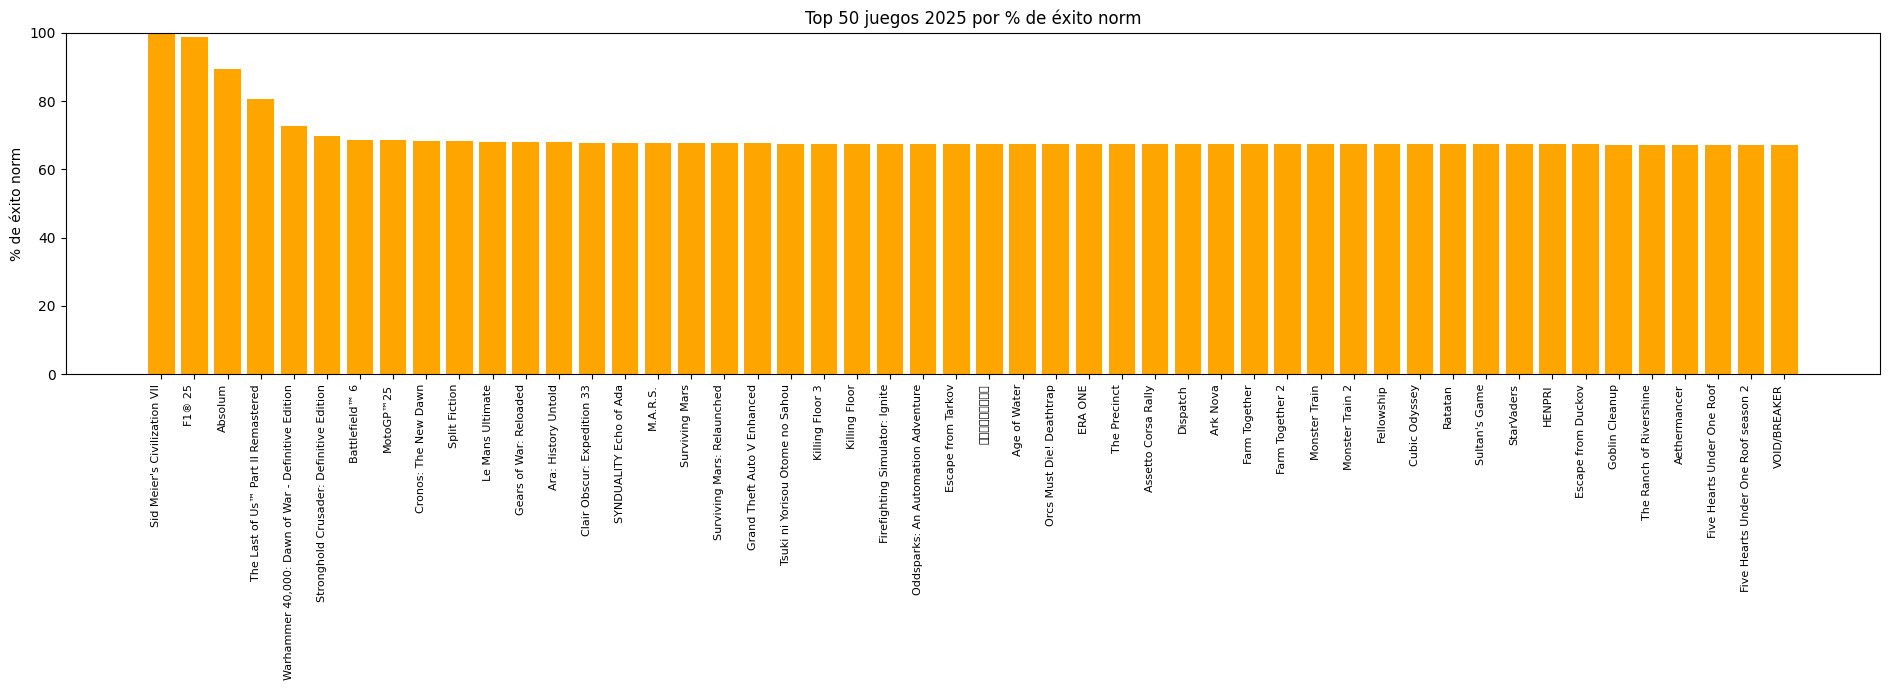

In [57]:
top_juegos = top_2025.head(50)

top_juegos['pct_exito_norm'] = top_juegos['pct_exito_predicho'] / top_juegos['pct_exito_predicho'].max() * 100

plt.figure(figsize=(19,7))
plt.bar(top_juegos['name'], top_juegos['pct_exito_norm'], color='orange')
plt.xticks(rotation=90, ha='right', fontsize = 8)
plt.ylabel('% de éxito norm')
plt.title('Top 50 juegos 2025 por % de éxito norm')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Alfinal conseguimos esto, por que se ve asi? parece ser que como muchos juegos comparten el genero de accion y single player estos tienden a conseguir el mismo puntaje, por lo que realmente no concluimos nada, aunque eso tambien refleja un poco la propia naturaleza de los videojuegos, puesto que son entornos abstractos que no siguen normal naturales como podria llegar a ser los empleos.